# AADt-VKM (Minor Grid)

In [1]:
import os
import seaborn
import pandas as pd

### Section 1: Opening File

In [2]:
PATH = "c:\Documents"
File1="LAEI2013_2013_AADT-VKM.xlsx"

df1= pd.read_excel(os.path.join(PATH, File1),sheet_name='MinorGrid_VKM_2013')               
df1.head(5)

,Year,ID,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Easting,Northing,speed (kph),VKM_Motorcycle,VKM_Taxi,...,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total
0,2013,5910,1,External,NonGLA,510500,203500,30,7223.168225,3303.116745,...,4513.072361,7680.054517,853.427764,309599.517097,183701.922502,164.155952,1083.285552,54429.435225,31.158503,572582.314443
1,2013,5911,2,External,NonGLA,511500,203500,30,4742.141375,2167.935313,...,2962.995481,5041.590112,559.699517,203270.767843,120611.398853,107.778290,711.243897,35736.287198,20.457482,375932.295360
2,2013,5912,3,External,NonGLA,512500,203500,30,7278.285529,3327.995491,...,4548.852095,7740.195812,860.663552,312015.145930,185135.244055,165.436767,1091.752757,54854.868005,31.402045,577049.842037
3,2013,5915,4,External,NonGLA,515500,203500,30,7204.224780,3294.143071,...,4499.043482,7654.621079,847.495192,308578.002296,183095.803234,163.614324,1079.683190,54248.435380,31.054888,570696.120915
4,2013,5916,5,External,NonGLA,516500,203500,30,6499.471249,2972.477278,...,4057.870123,6911.448474,766.513286,278614.894550,165317.091727,147.727276,974.893390,48983.295782,28.040823,515273.723959


In [3]:
#Check df1 dataset shape
df1.shape

(3355, 21)

In [4]:
#Check df1 data type
df1.dtypes

Year                      int64
ID                        int64
GRID_ExactCut_ID          int64
Location_ExactCut        object
BoroughName_ExactCut     object
Easting                   int64
Northing                  int64
speed (kph)               int64
VKM_Motorcycle          float64
VKM_Taxi                float64
VKM_Bus                 float64
VKM_Coach               float64
VKM_Rigid               float64
VKM_Artic               float64
VKM_Petrolcar           float64
VKM_Dieselcar           float64
VKM_Electriccar         float64
VKM_Petrollgv           float64
VKM_Diesellgv           float64
VKM_Electriclgv         float64
VKM_Total               float64
dtype: object

### Section 2: Data Tidy - Column naming¶

In [5]:
#Check column name
df1.columns

Index(['Year', 'ID', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'Easting', 'Northing', 'speed (kph)',
       'VKM_Motorcycle', 'VKM_Taxi', 'VKM_Bus', 'VKM_Coach', 'VKM_Rigid',
       'VKM_Artic', 'VKM_Petrolcar', 'VKM_Dieselcar', 'VKM_Electriccar',
       'VKM_Petrollgv', 'VKM_Diesellgv', 'VKM_Electriclgv', 'VKM_Total'],
      dtype='object')

In [6]:
# renaming columns
df1=df1.rename(columns={
     'speed (kph)':'Speed(kph)'
})
    
df1.columns     

Index(['Year', 'ID', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'Easting', 'Northing', 'Speed(kph)',
       'VKM_Motorcycle', 'VKM_Taxi', 'VKM_Bus', 'VKM_Coach', 'VKM_Rigid',
       'VKM_Artic', 'VKM_Petrolcar', 'VKM_Dieselcar', 'VKM_Electriccar',
       'VKM_Petrollgv', 'VKM_Diesellgv', 'VKM_Electriclgv', 'VKM_Total'],
      dtype='object')

### Section 3: Splitting Data into Zone

In [7]:
# Zone: Outer
df2 = df1.loc[df1['Location_ExactCut'] == "Outer"]
# Zone: External
df3= df1.loc[df1['Location_ExactCut']== "External"]
# Zone: Inner
df4= df1.loc[df1['Location_ExactCut']== "Inner"]
# Zone: Central 
df5= df1.loc[df1['Location_ExactCut']== "Central"]

### Section 4: Check and handling abnormal data

##### Check for object 

In [8]:
df1.describe(include='O')

,Location_ExactCut,BoroughName_ExactCut
count,3355,3355
unique,4,34
top,Outer,NonGLA
freq,1766,1010


In [9]:
df1.describe()

,Year,ID,GRID_ExactCut_ID,Easting,Northing,Speed(kph),VKM_Motorcycle,VKM_Taxi,VKM_Bus,VKM_Coach,VKM_Rigid,VKM_Artic,VKM_Petrolcar,VKM_Dieselcar,VKM_Electriccar,VKM_Petrollgv,VKM_Diesellgv,VKM_Electriclgv,VKM_Total
count,3355.0,3355.000000,3355.000000,3355.000000,3355.000000,3355.00000,3355.000000,3355.000000,3.355000e+03,3355.000000,3355.000000,3355.000000,3.355000e+03,3.355000e+03,3355.000000,3355.000000,3355.000000,3355.000000,3.355000e+03
mean,2013.0,10171.481073,1678.000000,529707.451565,178835.618480,28.93234,24268.334489,15743.834205,1.579291e+04,6907.519757,21607.891433,2395.633890,7.595515e+05,4.506824e+05,402.729624,2857.274427,143563.101211,82.183680,1.443855e+06
std,0.0,2159.850074,968.649403,14688.878533,12556.159991,2.52664,31679.697563,36121.710430,5.019600e+04,9235.614347,21630.650740,2391.880815,6.898642e+05,4.093333e+05,365.780018,2683.751660,134844.489369,77.192651,1.315523e+06
min,2013.0,5910.000000,1.000000,501500.000000,152500.000000,18.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2013.0,8487.500000,839.500000,517500.000000,169500.000000,30.00000,3928.713612,1884.331457,0.000000e+00,0.000000,4011.128048,445.558430,1.544532e+05,9.164531e+04,81.894210,560.205215,28147.383128,16.113162,2.912316e+05
50%,2013.0,10059.000000,1678.000000,529500.000000,179500.000000,30.00000,14380.646045,6887.264684,2.499144e+00,3031.316868,14639.216023,1624.210420,5.473559e+05,3.247755e+05,290.219214,2011.442660,101064.477189,57.855052,1.032572e+06
75%,2013.0,11797.000000,2516.500000,541500.000000,188500.000000,30.00000,33785.048736,16223.996597,9.637558e+03,10547.113086,34593.831345,3835.171927,1.300713e+06,7.717828e+05,689.664712,4742.600577,238290.883108,136.411247,2.466122e+06
max,2013.0,14708.000000,3355.000000,561500.000000,203500.000000,30.00000,382974.126037,589656.664318,1.065518e+06,65861.271712,163324.319827,17864.255012,3.768312e+06,2.235941e+06,1998.035529,13318.312369,669175.564050,383.074131,7.022360e+06


In [10]:
df2.isnull().sum()

Year                    0
ID                      0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Easting                 0
Northing                0
Speed(kph)              0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Bus                 0
VKM_Coach               0
VKM_Rigid               0
VKM_Artic               0
VKM_Petrolcar           0
VKM_Dieselcar           0
VKM_Electriccar         0
VKM_Petrollgv           0
VKM_Diesellgv           0
VKM_Electriclgv         0
VKM_Total               0
dtype: int64

##### Check for missing values

In [11]:
df3.isnull().sum()

Year                    0
ID                      0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Easting                 0
Northing                0
Speed(kph)              0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Bus                 0
VKM_Coach               0
VKM_Rigid               0
VKM_Artic               0
VKM_Petrolcar           0
VKM_Dieselcar           0
VKM_Electriccar         0
VKM_Petrollgv           0
VKM_Diesellgv           0
VKM_Electriclgv         0
VKM_Total               0
dtype: int64

In [12]:
df3.isnull().sum()

Year                    0
ID                      0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Easting                 0
Northing                0
Speed(kph)              0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Bus                 0
VKM_Coach               0
VKM_Rigid               0
VKM_Artic               0
VKM_Petrolcar           0
VKM_Dieselcar           0
VKM_Electriccar         0
VKM_Petrollgv           0
VKM_Diesellgv           0
VKM_Electriclgv         0
VKM_Total               0
dtype: int64

In [13]:
df5.isnull().sum()

Year                    0
ID                      0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Easting                 0
Northing                0
Speed(kph)              0
VKM_Motorcycle          0
VKM_Taxi                0
VKM_Bus                 0
VKM_Coach               0
VKM_Rigid               0
VKM_Artic               0
VKM_Petrolcar           0
VKM_Dieselcar           0
VKM_Electriccar         0
VKM_Petrollgv           0
VKM_Diesellgv           0
VKM_Electriclgv         0
VKM_Total               0
dtype: int64

##### Fill missing values or Zero with mean

In [14]:
# Replacing Zero values with mean Outer region
dfn7= df2.iloc[:,8:]
dfn8= dfn7.mean(axis=0, skipna=True)
dfn9=df2.replace(0,dfn8)
df2=dfn9

# Replacing missing values with mean External region
dfn10= df3.iloc[:,8:]
dfn11= dfn10.mean(axis=0, skipna=True)
dfn12=df3.replace(0,dfn11)
df3=dfn12

# Replacing missing values with mean Inner region
dfn13= df4.iloc[:,8:]
dfn14= dfn13.mean(axis=0, skipna=True)
dfn15=df4.replace(0,dfn14)
df4=dfn15

# Replacing missing values with mean Central region
dfn16= df5.iloc[:,8:]
dfn17= dfn16.mean(axis=0, skipna=True)
dfn18=df5.replace(0,dfn17)
df5=dfn18

##### check for correlation

<AxesSubplot:>

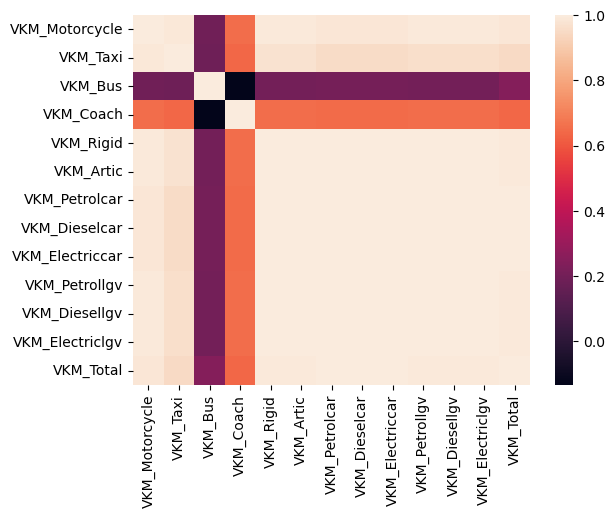

In [15]:
#Check correlation performance - df2
data=pd.DataFrame(df2.iloc[:,8:])
data1=data.corr()
seaborn.heatmap(data1)

In [16]:
# Drop those parameters with correlation of greater than 0.90
df2.drop("VKM_Electriclgv", axis=1, inplace=True)
df2.drop("VKM_Diesellgv", axis=1, inplace=True)
df2.drop("VKM_Petrollgv", axis=1, inplace=True)
df2.drop("VKM_Electriccar", axis=1, inplace=True)
df2.drop("VKM_Dieselcar", axis=1, inplace=True)
df2.drop("VKM_Petrolcar", axis=1, inplace=True)
df2.drop("VKM_Artic", axis=1, inplace=True)
df2.drop("VKM_Rigid", axis=1, inplace=True)

<AxesSubplot:>

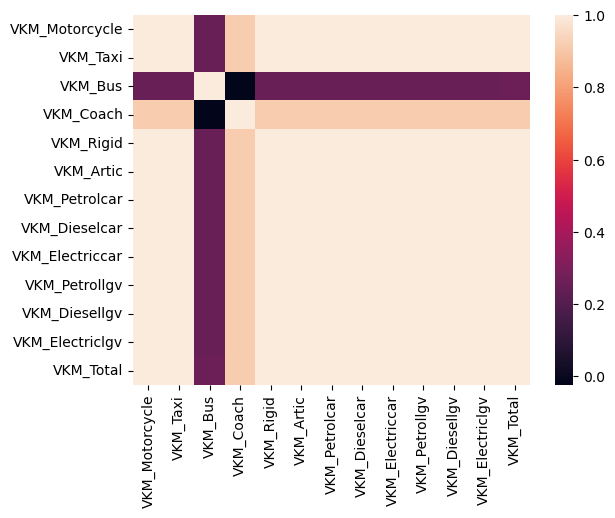

In [17]:
#Check correlation performance - df3
data=pd.DataFrame(df3.iloc[:,8:])
data1=data.corr()
seaborn.heatmap(data1)

In [18]:
# Drop those parameters with correlation of greater than 0.90
df3.drop("VKM_Electriclgv", axis=1, inplace=True)
df3.drop("VKM_Diesellgv", axis=1, inplace=True)
df3.drop("VKM_Petrollgv", axis=1, inplace=True)
df3.drop("VKM_Electriccar", axis=1, inplace=True)
df3.drop("VKM_Dieselcar", axis=1, inplace=True)
df3.drop("VKM_Petrolcar", axis=1, inplace=True)
df3.drop("VKM_Artic", axis=1, inplace=True)
df3.drop("VKM_Rigid", axis=1, inplace=True)

<AxesSubplot:>

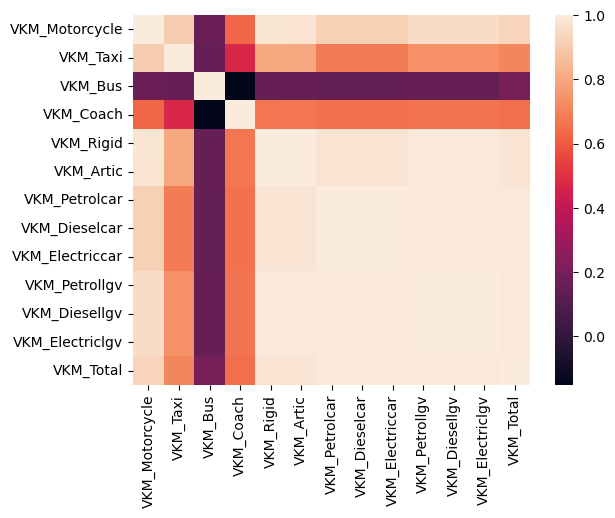

In [19]:
#Check correlation performance - df4
data=pd.DataFrame(df4.iloc[:,8:])
data1=data.corr()
seaborn.heatmap(data1)

In [20]:
# Drop those parameters with correlation of greater than 0.90
df4.drop("VKM_Electriclgv", axis=1, inplace=True)
df4.drop("VKM_Diesellgv", axis=1, inplace=True)
df4.drop("VKM_Petrollgv", axis=1, inplace=True)
df4.drop("VKM_Electriccar", axis=1, inplace=True)
df4.drop("VKM_Dieselcar", axis=1, inplace=True)
df4.drop("VKM_Petrolcar", axis=1, inplace=True)
df4.drop("VKM_Artic", axis=1, inplace=True)
df4.drop("VKM_Rigid", axis=1, inplace=True)

<AxesSubplot:>

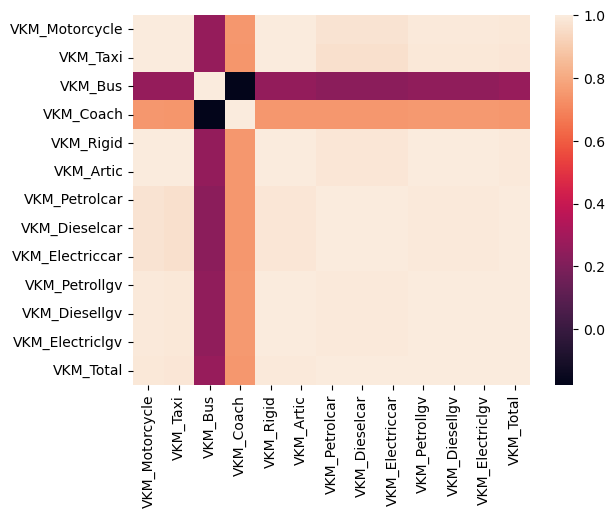

In [21]:
#Check correlation performance - df4
data=pd.DataFrame(df5.iloc[:,8:])
data1=data.corr()
seaborn.heatmap(data1)

In [22]:
# Drop those parameters with correlation of greater than 0.90
df5.drop("VKM_Electriclgv", axis=1, inplace=True)
df5.drop("VKM_Diesellgv", axis=1, inplace=True)
df5.drop("VKM_Petrollgv", axis=1, inplace=True)
df5.drop("VKM_Electriccar", axis=1, inplace=True)
df5.drop("VKM_Dieselcar", axis=1, inplace=True)
df5.drop("VKM_Petrolcar", axis=1, inplace=True)
df5.drop("VKM_Artic", axis=1, inplace=True)
df5.drop("VKM_Rigid", axis=1, inplace=True)

In [23]:
df1=pd.concat([df2,df3,df4,df5],axis=0)
df1

,Year,ID,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Easting,Northing,Speed(kph),VKM_Motorcycle,VKM_Taxi,VKM_Bus,VKM_Coach,VKM_Total
521,2013,6443,522,Outer,Enfield,527500,200500,30,834.643653,381.774603,0.089167,524.900721,6.614825e+04
523,2013,6445,524,Outer,Enfield,529500,200500,30,20616.997830,9704.423814,20302.887376,6577.296565,1.640235e+06
525,2013,6447,526,Outer,Enfield,531500,200500,30,7378.477412,3372.957737,20302.887376,4643.829021,5.849084e+05
527,2013,6449,528,Outer,Enfield,533500,200500,30,20616.997830,9704.423814,20302.887376,6577.296565,1.640235e+06
529,2013,6451,530,Outer,Enfield,535500,200500,30,730.074853,333.787878,20302.887376,459.488604,5.787427e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,2013,9717,3350,Central,Hackney,533500,181500,18,8996.649909,14166.027954,19940.739874,1613.225666,1.107430e+05
3351,2013,10059,3352,Central,Southwark,531500,179500,18,181781.970555,279884.791227,6917.368346,23780.302227,2.199204e+06
3352,2013,9714,3353,Central,Camden,530500,181500,18,265377.375688,408595.152746,96183.663942,9308.431693,3.261916e+06
3353,2013,9716,3354,Central,Islington,532500,181500,18,17718.926363,27281.478382,29547.453009,9308.431693,2.409200e+05


In [24]:
PATH = "c:\Documents"
OUTPUT_FILE="MinorAADT-VKM.xlsx"

FILE_EXIST = os.path.exists(os.path.join(PATH, OUTPUT_FILE))
if FILE_EXIST:
    os.remove(os.path.join(PATH, OUTPUT_FILE))

with pd.ExcelWriter(os.path.join(PATH, OUTPUT_FILE)) as writer:
    df1.to_excel(writer,sheet_name='MinorAADT')
    df2.to_excel(writer, sheet_name='Outer')
    df3.to_excel(writer, sheet_name='External')
    df4.to_excel(writer, sheet_name='Inner')
    df5.to_excel(writer, sheet_name='Central')